In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore # https://github.com/8080labs/ppscore
from tqdm.notebook import tqdm
from calendar import month_name
from difflib import get_close_matches
from collections import defaultdict

In [2]:
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

In [ ]:
data_dir = '../../data/transformed_data/'

# Air

In [3]:
df_uk_air = pd.read_csv(data_dir + 'UK/uk_air_aligned_units.csv', index_col=[0])
df_us_air = pd.read_csv(data_dir + 'USA/us_air_aligned_units.csv', index_col = [0])
df_ca_air = pd.read_csv(data_dir + 'Canada/ca_air_aligned_units.csv', index_col=[0])

In [4]:
if df_uk_air.columns.str.contains('_units').sum() > 0:
    air_units = df_uk_air[df_uk_air.columns[df_uk_air.columns.str.contains('_units')][0]].iloc[0]

else:
    print('No unit columns found')

In [5]:
df_uk_air.drop(columns=df_uk_air.columns[df_uk_air.columns.str.contains('_units')], inplace=True)
df_us_air.drop(columns=df_us_air.columns[df_us_air.columns.str.contains('_units')], inplace=True)
df_ca_air.drop(columns=df_ca_air.columns[df_ca_air.columns.str.contains('_units')], inplace=True)
df_uk_air.columns = df_uk_air.columns.str.replace('_mean', '')
df_us_air.columns = df_us_air.columns.str.replace('_mean', '')
df_ca_air.columns = df_ca_air.columns.str.replace('_mean', '')
df_uk_air.columns = df_uk_air.columns.str.upper()
df_us_air.columns = df_us_air.columns.str.upper()
df_ca_air.columns = df_ca_air.columns.str.upper()

In [6]:
def plot_air_pollutant(pollutant, type='plot'):
    plt.figure(figsize=(16,6))
    p = pollutant.upper()
    if type=='plot':
        plt.plot(df_uk_air.index, df_uk_air[p], lw=3, label = 'United Kingdom', color = 'orange')
        plt.plot(df_us_air.index, df_us_air[p], lw=3, label = 'United States', color = 'b')
        plt.plot(df_ca_air.index, df_ca_air[p], lw=3, label = 'Canada', color = 'g')
        plt.legend(title='Countries')
        plt.xlim(df_ca_air.index[0] - 0.5, df_ca_air.index[-1] + 0.5)
        plt.xticks(df_ca_air.index)
        plt.xlabel('Years')
    elif type == 'hist':
        plt.hist(df_us_air[p], bins= 20, histtype='stepfilled', alpha = 0.2, label = 'US', color = 'b')
        plt.hist(df_uk_air[p], bins= 20, histtype='stepfilled', alpha = 0.2, label = 'UK', color = 'orange')
        plt.hist(df_ca_air[p], bins= 20, histtype='stepfilled', alpha = 0.2, label = 'CA', color = 'g')
        plt.legend(title=p)
        plt.xlabel('{:s}'.format(air_units))

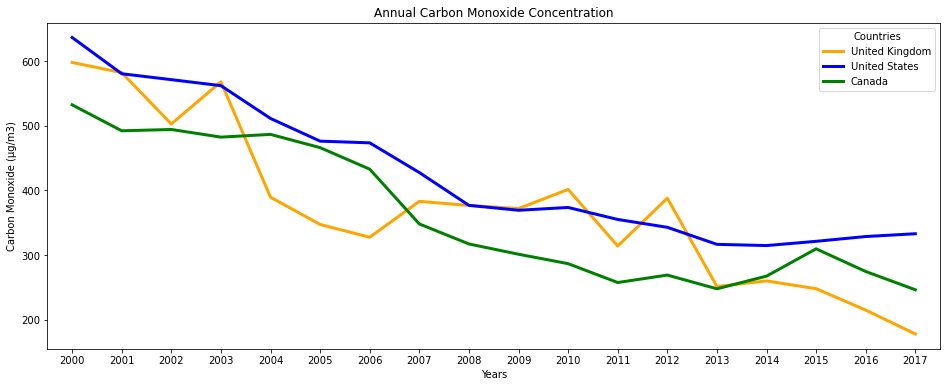

In [7]:
plot_air_pollutant('CO')
plt.title('Annual Carbon Monoxide Concentration')
plt.ylabel('Carbon Monoxide ({:s})'.format(air_units));

# plot_air_pollutant('CO','hist');

Carbon Monoxide has been decreasing overall since the beginning of this dataset. The United States has generally had the largest concentration of CO across the years, and the level of CO doesn't seem to decrease as significantly in the last year of the dataset as the other two countries. 

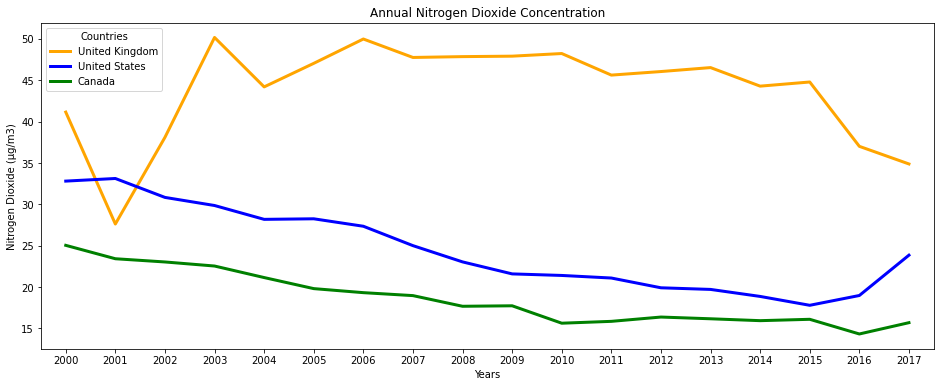

In [8]:
plot_air_pollutant('NO2')
plt.title('Annual Nitrogen Dioxide Concentration')
plt.ylabel('Nitrogen Dioxide ({:s})'.format(air_units));

# plot_air_pollutant('NO2','hist');

We can see that the United Kingdom has a substancially greater concentration of Nitrogen Dioxide year after year over the NO2 levels in Canada and the US. While the other two contries seem to be improving their levels of NO2 air pollution concentrations, decreasing as time goes on up until 2016, the United Kingdom's level of NO2 stays around an annual average of 45μg/m$^{3}$ and decreasing at the tail end of the dataset. 

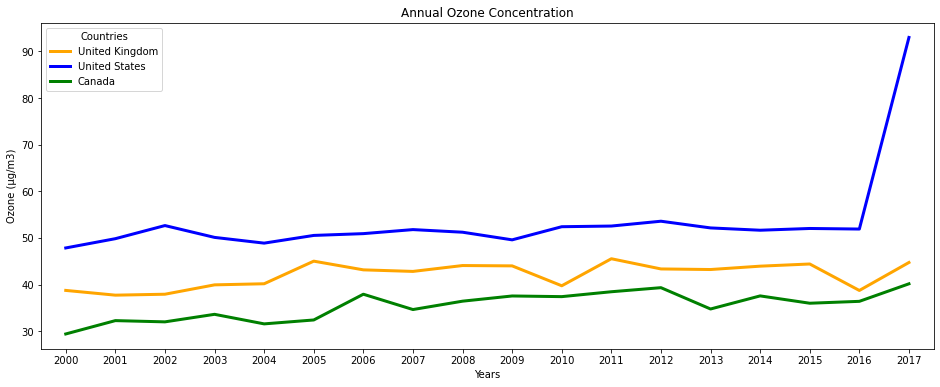

In [9]:
plot_air_pollutant('o3')
plt.title('Annual Ozone Concentration')
plt.ylabel('Ozone ({:s})'.format(air_units));

# plot_air_pollutant('o3','hist');

The concentrations of ground level ozone seem consistant across the country, discounting the large spike for the United States in 2017. There may be a slight gradual increase, though this isn't obvious at first blush. The United States does seem to consistantly have the highest concentration of ozone, around 50 μg/m$^{3}$, with Canada having the best ozone levels, around 35 μg/m$^{3}$.

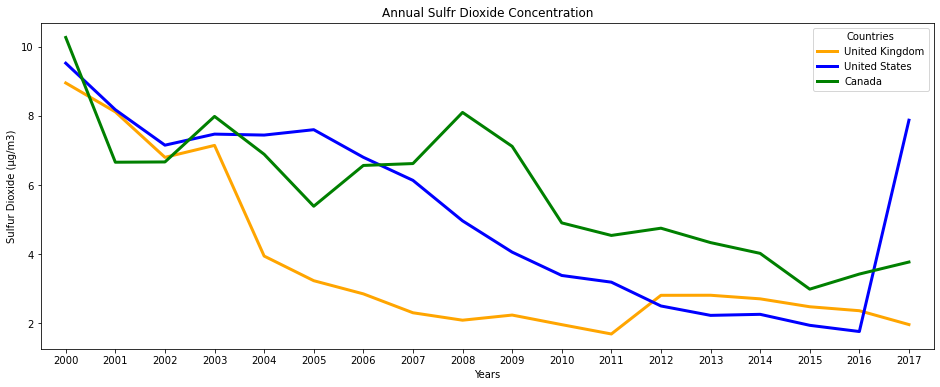

In [10]:
plot_air_pollutant('so2')
plt.title('Annual Sulfr Dioxide Concentration')
plt.ylabel('Sulfur Dioxide ({:s})'.format(air_units));

# plot_air_pollutant('so2','hist');

SO2 seems to have a proportionally significant drop in concentration levels across all three countries, again discounting the spike in the United States in 2017. Canada typically sees the highest concentration of Sulfur Dioxide, experiencing some sizable increases from 2006 to 2008 before falling off again.

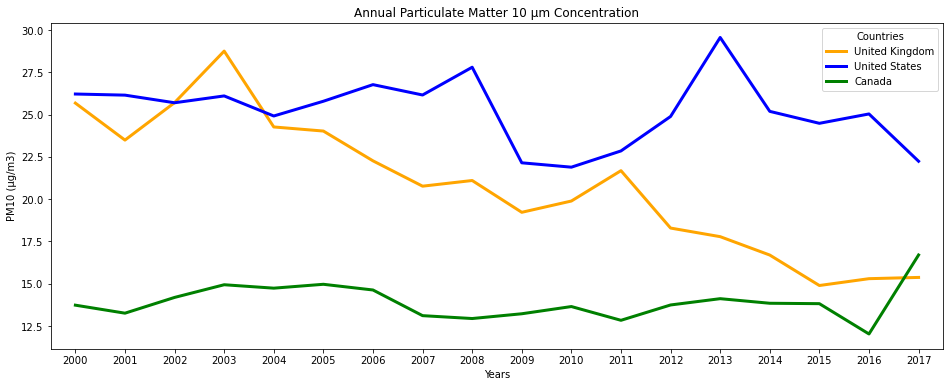

In [11]:
plot_air_pollutant('pm10')
plt.title('Annual Particulate Matter 10 μm Concentration')
plt.ylabel('PM10 ({:s})'.format(air_units));

# plot_air_pollutant('pm10', 'hist')

PM$_{10}$ is a measure of air pollutants, or particulate matter, that measure 10 micrmeters or smaller in diameter and can be composed of many different substances. Exposure to high concentrations of PM$_{10}$ is known to be a source of health issues including asthma, bronchitis, high blood pressure, and worse. In the United States, average annual PM$_{10}$ levels are in the neighborhood of 25 to 30 μg/m$^{3}$, overtaking the concentrations in both Canada and the United Kingdom. Canada seems to be doing well with PM$_{10}$, having the lowest concentration levels bar for 2017. At the beginning of this dataset, the United Kingdom had concentrations of PM$_{10}$ matching that of the United States, but has been improving across the yearly spread levels close to that of Canada.

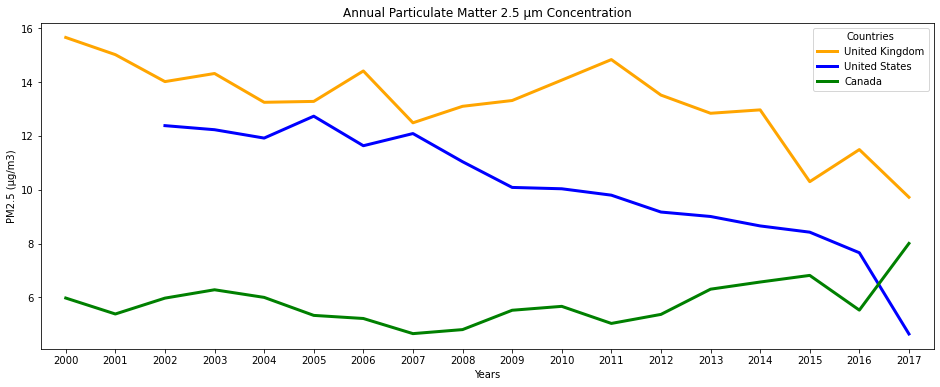

In [12]:
plot_air_pollutant('pm2.5')
plt.title('Annual Particulate Matter 2.5 μm Concentration')
plt.ylabel('PM2.5 ({:s})'.format(air_units));

# plot_air_pollutant('pm2.5', 'hist')

Similar to PM$_{10}$, PM$_{2.5}$ is a measure of sub-microscopic particulate matter in the air measuring 2.5 micrometers or smaller in diameter. This, again, is is composed of various elements and pieces of matter that are too small to be seen by normal microscopy. Concentration levels of PM$_{2.5}$ seem to be on the decline in both the US and the UK, with Canada having the lowest levels up to 2017. 

In [13]:
# The US data is missing for PM2.5 in 2001 and there are spikes in 2017 for both SO2 and O3. Calling API to get new values incase the data from the datasets is incorrect

# states range from 01 to 56. further regions such as Guam, some Canadian sites, Puerto Rico are also available but wont be considered
# 07, 14 are not valid state codes

pm25_param_code = 81104
ozone_param_code = 44201
so2_param_code = 42401
state_codes = ['01', '02', '03', '04', '05', '06', '08', '09', '10', '11', '12', '13', *np.arange(15,57).astype(str)]
API_KEY = ''
email= ''


# import requests, time

def get_us_pollutant_data(param, year):
    param_array = np.array([])
    try:
        for state in tqdm(state_codes):
            aqs_req = 'https://aqs.epa.gov/data/api/annualData/byState?email={}&key={}&param={}&bdate={}0101&edate={}1231&state={}'.format(email, API_KEY, param, year, year, state)
            req = requests.get(aqs_req)
            param_array = np.append(param_array, req.json()['Data'])
            time.sleep(3) # time delay to allow lag in calls to api to establish connections properly
    except Exception: 
        pass
    
    return param_array

# a_o3 = get_us_pollutant_data(ozone_param_code, 2017)
# a_so2 = get_us_pollutant_data(so2_param_code, 2017)
# a_pm25 = get_us_pollutant_data(pm25_param_code, 2001)

In [14]:
# Requires API_KEY
"""
o3_means = [s['arithmetic_mean'] * 1000 for s in a_o3 if s['sample_duration'].find('1') != -1] # measured in ppm, need to convert to ppb to µg/m3
so2_means = [s['arithmetic_mean'] for s in a_so2 if s['sample_duration']=='1 HOUR'] # measured in ppb
pm25_means = [s['arithmetic_mean'] for s in a_pm25] # measured in µg/m3

display(np.mean(pp_to_gm3(np.array(o3_means), molecular_weight_o3)), df_us_air['O3'].loc[2017])
display(np.mean(pp_to_gm3(np.array(so2_means), molecular_weight_so2)), df_us_air['SO2'].loc[2017])
display(np.mean(pm25_means), df_us_air['PM2.5']) # the average value for 2001 seems in line with the average for other years for PM2.5 in the USA.

molecular_weight_o3 = 48 # g/mol
molecular_weight_so2 = 64.066 # g/mol
gm3_to_pp = lambda gm3, weight: (gm3 * 24.25)/(weight)
pp_to_gm3 = lambda pp, weight: (0.0409 * pp * weight)

"""
pm25_mean = 12.35466795
df_us_air['PM2.5'].loc[2001] = pm25_mean

It seems these spikes in concentration level aren't due to errors in data, but rather associated to some factor in the US that caused these levels to spike.

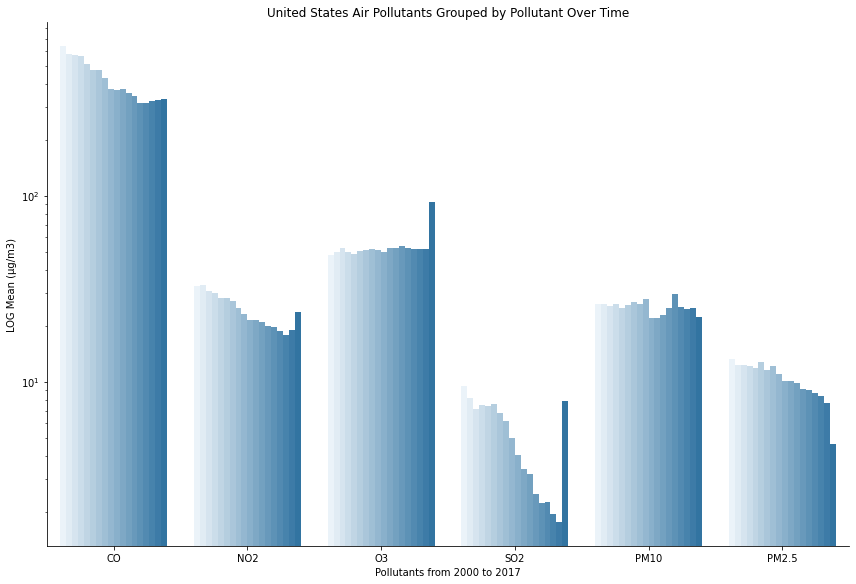

In [15]:
# US pollutant concentration from 00 to 17 by pollutant
df_us_air_long = df_us_air.reset_index().melt(id_vars='year', var_name='pollutant', value_name='mean')
sns.catplot('pollutant', hue='year', y='mean', data=df_us_air_long, kind='bar', color='C0', height= 8, aspect=3/2, legend=False).set\
    (title='United States Air Pollutants Grouped by Pollutant Over Time', ylabel='LOG Mean ({:s})'.format(air_units), xlabel='Pollutants from 2000 to 2017', yscale='log');

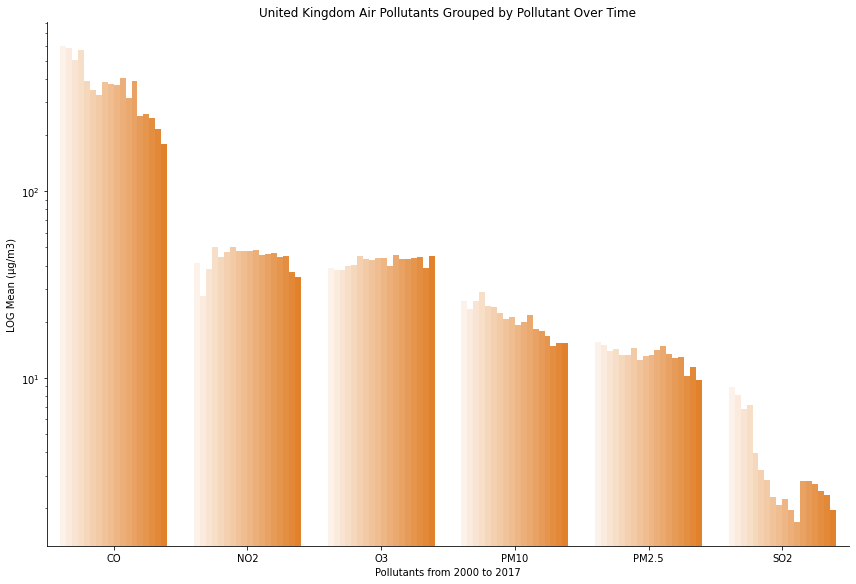

In [16]:
# UK pollutant concentration from 00 to 17 by pollutant
df_uk_air_long = df_uk_air.reset_index().melt(id_vars='year', var_name='pollutant', value_name='mean')
sns.catplot('pollutant', hue='year', y='mean', data=df_uk_air_long, kind='bar', color='C1', height= 8, aspect=3/2, legend=False).set\
    (title='United Kingdom Air Pollutants Grouped by Pollutant Over Time', ylabel='LOG Mean ({:s})'.format(air_units), xlabel='Pollutants from 2000 to 2017', yscale='log');

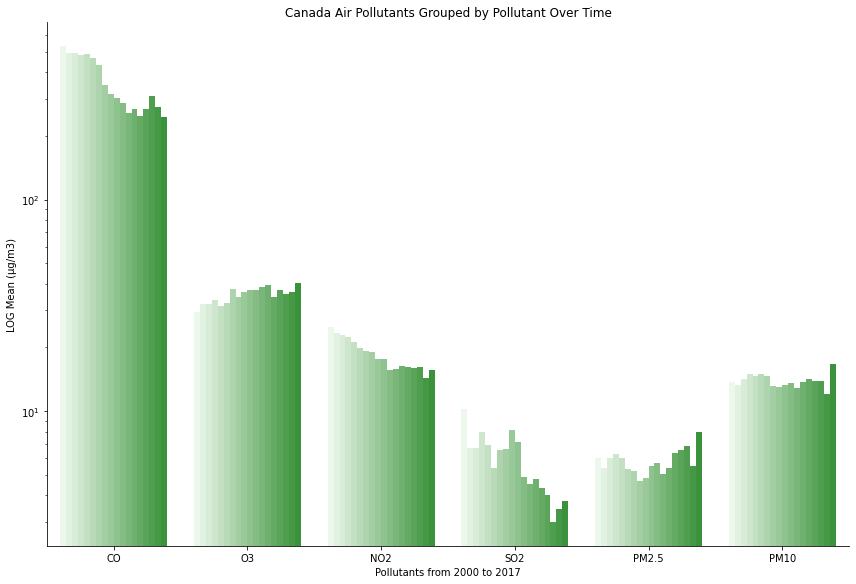

In [17]:
# Canada pollutant concentration from 00 to 17 by pollutant
df_ca_air_long = df_ca_air.reset_index().melt(id_vars='year', var_name='pollutant', value_name='mean')
sns.catplot('pollutant', hue='year', y='mean', data=df_ca_air_long, kind='bar', color='C2', height= 8, aspect=3/2, legend=False).set\
    (title='Canada Air Pollutants Grouped by Pollutant Over Time', ylabel='LOG Mean ({:s})'.format(air_units), xlabel='Pollutants from 2000 to 2017', yscale='log');

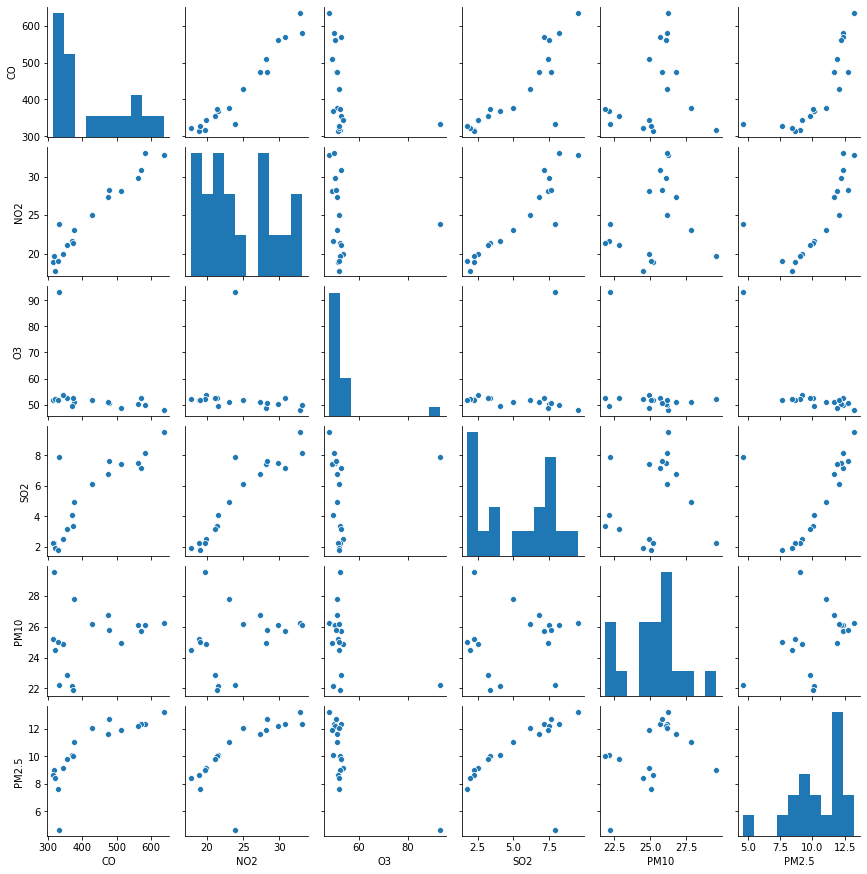

In [18]:
sns.pairplot(df_us_air, kind='scatter', height=2);

PM$_{2.5}$ has a seemingly stronger relation to almost all other pollutants. O3 is weaker than the rest. Ozone in general seems to be have the weakest relationship to other pollutants.

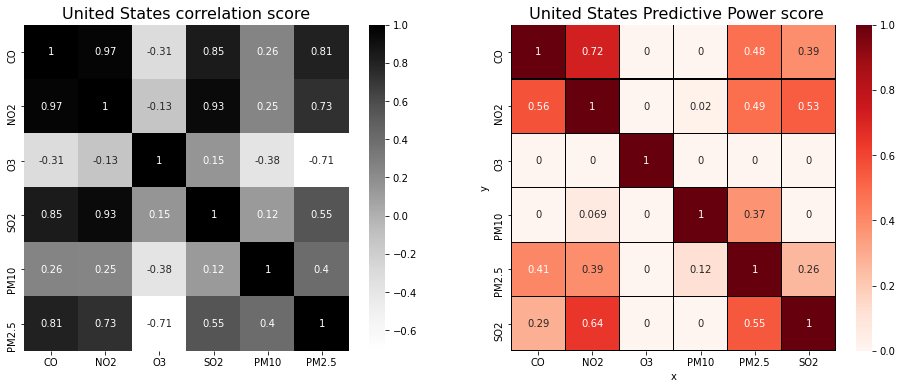

In [19]:
fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(121)
sns.heatmap(df_us_air.corr(), cmap='Greys', annot=True, ax=ax1)
ax1.set_title('United States correlation score', size=16);

ax2 = fig.add_subplot(122)
df_us_ppscore = ppscore.matrix(df_us_air)
us_ppm = df_us_ppscore[['x', 'y','ppscore']].pivot(columns='x', index ='y', values='ppscore')
sns.heatmap(us_ppm, cmap='Reds', linewidths=0.1, linecolor='k', annot=True, ax=ax2)
ax2.set_title(' United States Predictive Power score', size=16);

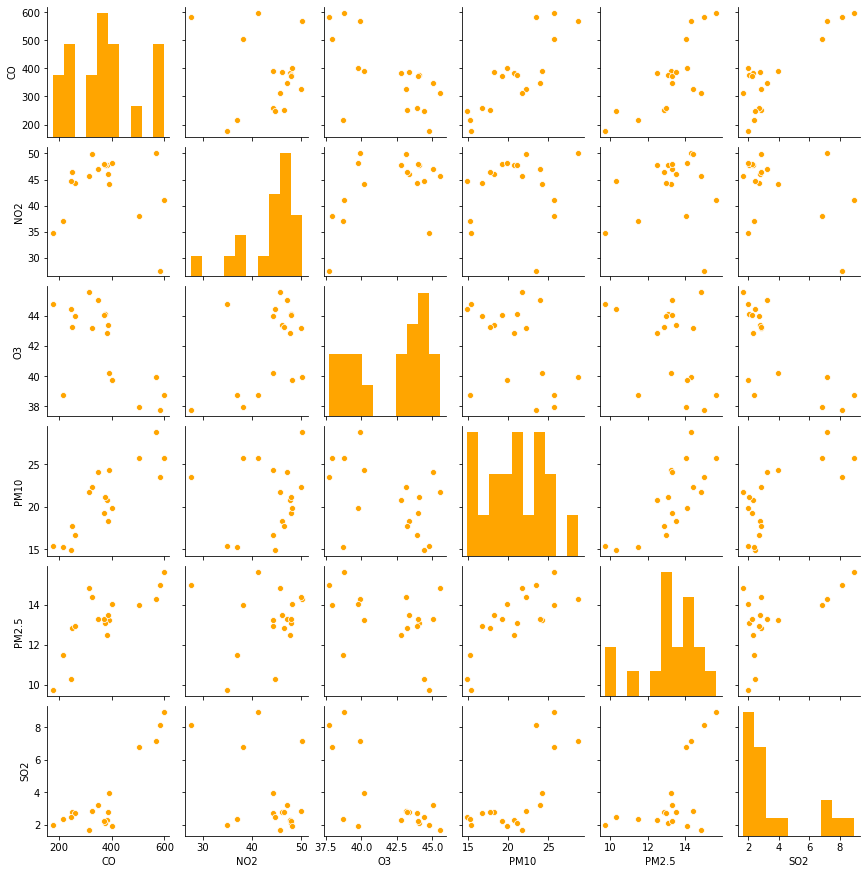

In [20]:
sns.pairplot(df_uk_air, kind = 'scatter', plot_kws={'color':'orange'}, diag_kws={'color':'orange'}, height=2);

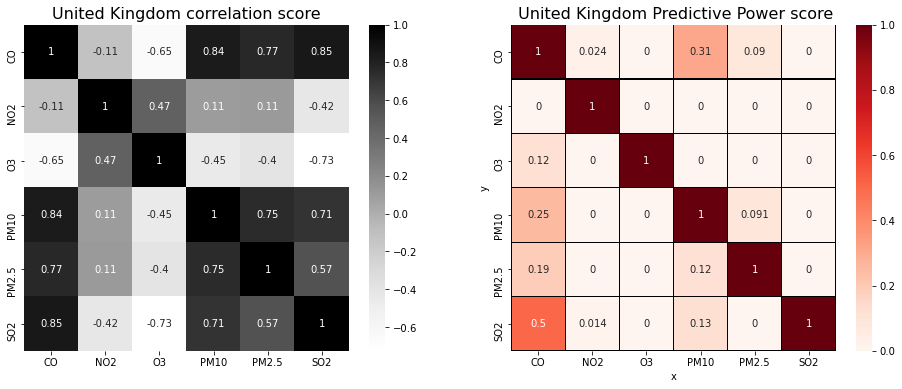

In [21]:
fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(121)
sns.heatmap(df_uk_air.corr(), cmap='Greys', annot=True, ax=ax1)
ax1.set_title('United Kingdom correlation score', size=16);

ax2 = fig.add_subplot(122)
df_uk_ppscore = ppscore.matrix(df_uk_air)
uk_ppm = df_uk_ppscore[['x', 'y','ppscore']].pivot(columns='x', index ='y', values='ppscore')
sns.heatmap(uk_ppm, cmap='Reds', linewidths=0.1, linecolor='k', annot=True, ax=ax2)
ax2.set_title(' United Kingdom Predictive Power score', size=16);

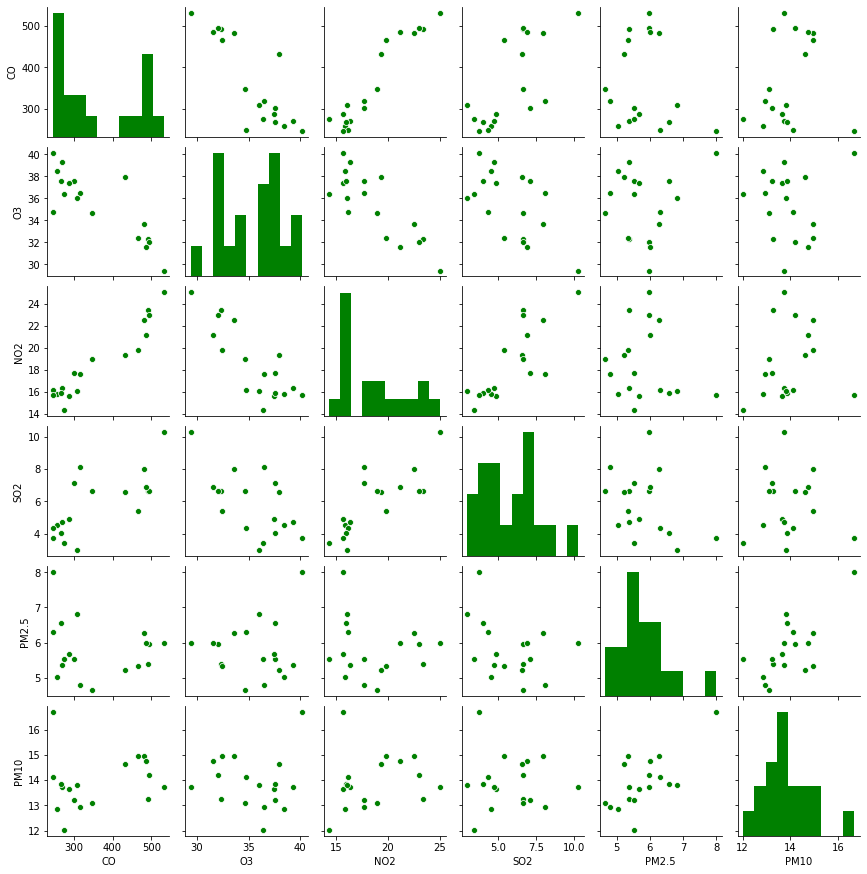

In [22]:
sns.pairplot(df_ca_air, kind='scatter', plot_kws={'color':'g'}, diag_kws={'color':'g'}, height=2);

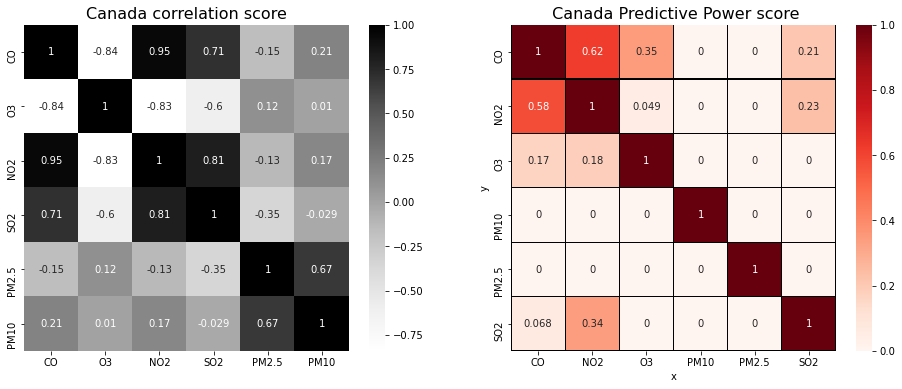

In [23]:
fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(121)
sns.heatmap(df_ca_air.corr(), cmap='Greys', annot=True, ax=ax1)
ax1.set_title('Canada correlation score', size=16);

ax2 = fig.add_subplot(122)
df_ca_ppscore = ppscore.matrix(df_ca_air)
ca_ppm = df_ca_ppscore[['x', 'y','ppscore']].pivot(columns='x', index ='y', values='ppscore')
sns.heatmap(ca_ppm, cmap='Reds', linewidths=0.1, linecolor='k', annot=True, ax=ax2)
ax2.set_title(' Canada Predictive Power score', size=16);

Carbon Monoxide seems to be the strongest predictor for other pollutant levels across the different countries. NO2 has some correlations in the US and Canada dataset, and PM2.5 seems to have a higher correlation and predictive power for the US but falls off in the outher datasets. As seen in the PairPlots, Ozone seems to have little to no correlation to other air pollutants.

In [24]:
df_us_air_long['Country'] = 'US'
df_uk_air_long['Country'] = 'UK'
df_ca_air_long['Country'] = 'CA'
df_air_long = df_us_air_long.append([df_ca_air_long, df_uk_air_long])

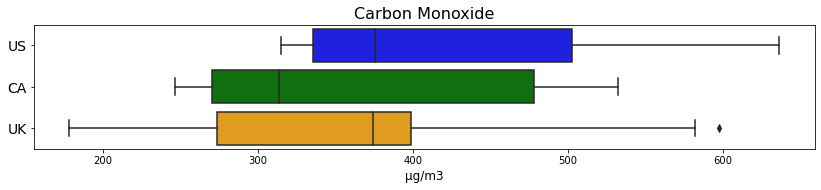

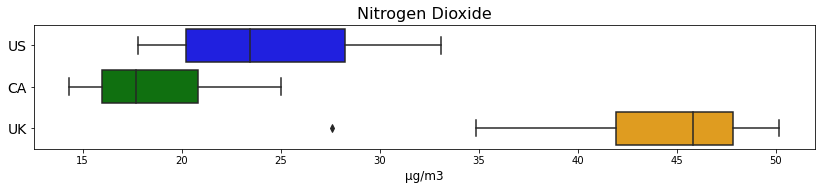

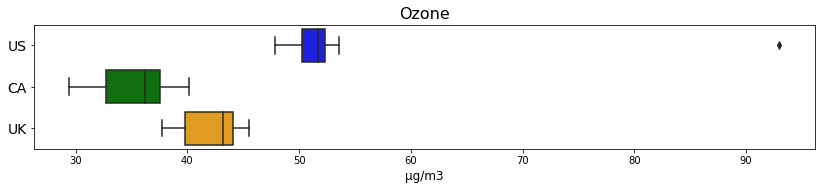

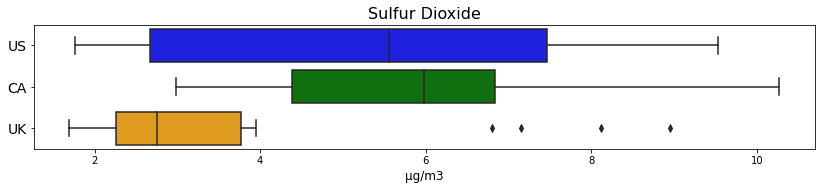

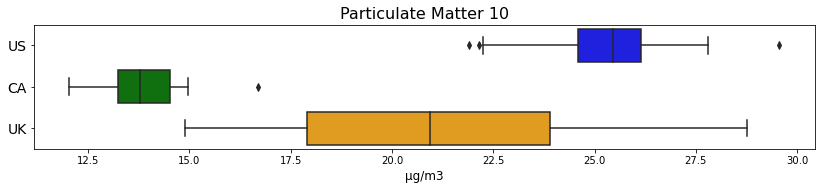

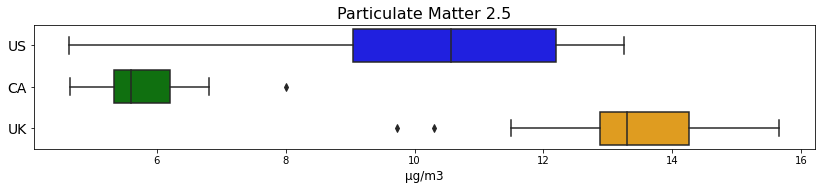

In [25]:
for i, c in zip(range(1,7),df_us_air.columns):
    col_name_dict = {'CO': 'Carbon Monoxide',
                    'NO2': 'Nitrogen Dioxide',
                    'O3': 'Ozone',
                    'SO2': 'Sulfur Dioxide',
                    'PM10': 'Particulate Matter 10',
                    'PM2.5': 'Particulate Matter 2.5'}
    plt.figure(figsize=(14,16)).add_subplot(6,1,i)
    country_colors = {"US": "b", "UK": "orange", "CA":"g"}
    sns.boxplot(data = df_air_long.iloc[np.where(df_air_long.pollutant == c)[0]], x = 'mean', y = 'Country',\
                orient='h', palette=country_colors)
    plt.title(col_name_dict[c], size=16)
    plt.yticks(size=14)
    plt.ylabel('')
    plt.xlabel(air_units, size=12)

In [26]:
df_us_air.to_pickle(data_dir + 'USA/df_us_air_small.pkl')
df_uk_air.to_pickle(data_dir + 'UK/df_uk_air_small.pkl')
df_ca_air.to_pickle(data_dir + 'Canada/df_ca_air_small.pkl')

# Fuel

In [27]:
df_us_fuel = pd.read_csv(data_dir + 'USA/us_fuel_aligned.csv')
df_uk_fuel = pd.read_csv(data_dir + 'UK/uk_fuel_aligned.csv',encoding='latin_1')
df_ca_fuel = pd.read_csv(data_dir + 'Canada/ca_fuel_aligned.csv')

df_us_fuel.make = df_us_fuel.make.str.upper()
df_us_fuel.model = df_us_fuel.model.str.upper()

df_uk_fuel.make = df_uk_fuel.make.str.upper()
df_uk_fuel.model = df_uk_fuel.model.str.upper()

df_ca_fuel.make = df_ca_fuel.make.str.upper()
df_ca_fuel.model = df_ca_fuel.model.str.upper()

In [28]:
us_vehicle_class_to_ca_dict = {
    'Midsize Cars':'MID-SIZE',
    'Subcompact Cars':'SUBCOMPACT',
    'Two Seaters':'TWO-SEATER',
    'Minicompact Cars':'MINICOMPACT', 
    'Compact Cars':'COMPACT', 
    'Small Station Wagons':'STATION WAGON - SMALL',
    'Midsize Station Wagons':'STATION WAGON - MID-SIZE', 
    'Large Cars':'FULL-SIZE',
    'Sport Utility Vehicle - 4WD':'SUV', 
    'Vans, Cargo Type': 'VAN - CARGO',
    'Vans, Passenger Type': 'VAN - PASSENGER',
    'Sport Utility Vehicle - 2WD' : 'SUV',
    'Small Pickup Trucks 2WD':'PICKUP TRUCK - SMALL',
    'Standard Pickup Trucks 4WD': 'PICKUP TRUCK - STANDARD',
    'Standard Pickup Trucks 2WD': 'PICKUP TRUCK - STANDARD', 
    'Minivan - 2WD':'MINIVAN',
    'Minivan - 4WD':'MINIVAN',
    'Special Purpose Vehicle 4WD':'SPECIAL PURPOSE VEHICLE', 
    'Special Purpose Vehicle':'SPECIAL PURPOSE VEHICLE',
    'Special Purpose Vehicles':'SPECIAL PURPOSE VEHICLE', 
    'Small Pickup Trucks 4WD' : 'PICKUP TRUCK - SMALL',
    'Special Purpose Vehicle 2WD':'SPECIAL PURPOSE VEHICLE', 
    'Small Sport Utility Vehicle 4WD' : 'SUV - SMALL',
    'Small Sport Utility Vehicle 2WD' : 'SUV - SMALL',
    'Standard Sport Utility Vehicle 4WD':  'SUV - STANDARD',
    'Standard Sport Utility Vehicle 2WD':  'SUV - STANDARD'
}

df_us_fuel.vehicle_class = df_us_fuel.vehicle_class.map(us_vehicle_class_to_ca_dict)

# Some additional data cleaning, visualization follows header below

In [29]:
# cleaning UK model names. This column (as well as the transmission column seen previously) is an agglomeration of vehicle information, following no set guidelines for recording the vehicle information.
# Some model names contain useful information like the vehicle class, while others are a mix of the make, model, submodel, model year, model month... Some extra cleaning was required. 

df_uk_fuel.model = df_uk_fuel.model.str.replace('\(.+\)', '')
uk_model_value_df = df_uk_fuel.model.str.split(',', expand=True)[0]

months = [m.upper() for m in month_name[1:]]
years = [str(y) for y in range(2000, 2018)]

for m in tqdm(df_uk_fuel.make.unique(), leave=False, desc='makes'):
    uk_model_value_df = uk_model_value_df.str.replace(m, '')
    
uk_model_value_df = uk_model_value_df.str.replace('MODEL.*$', '')
uk_model_value_df = uk_model_value_df.str.replace('FROM.*$', '')
uk_model_value_df = uk_model_value_df.str.replace('[\d]{4}MY\s?', '')
uk_model_value_df = uk_model_value_df.str.replace('[\d]{2}MY\s?', '')
uk_model_value_df = uk_model_value_df.str.replace('MY\s?[\d]{4}', '')

for m in tqdm(months, leave=False, desc='months'):
    uk_model_value_df = uk_model_value_df.str.replace(m+'\s.*', '')
    
uk_model_value_df = uk_model_value_df.str.replace('\s[ON]', '')
uk_model_value_df = uk_model_value_df.str.replace('\sON', '')

for y in tqdm(years, leave=False, desc='years'):
    uk_model_value_df = uk_model_value_df.str.replace('\s'+y+'.*', '')
    
uk_model_value_df= uk_model_value_df.str.replace('\sMY\d{4}', '')
uk_model_value_df = uk_model_value_df.str.replace('\sMY\d{2}.*', '')
uk_model_value_df = uk_model_value_df.str.replace('\sMY$', '')
uk_model_value_df = uk_model_value_df.str.replace('\s$', '')
uk_model_value_df = uk_model_value_df.str.replace('^\s*', '')
uk_model_value_df = uk_model_value_df.str.replace('COUP.*', 'COUPE')
uk_model_value_df = uk_model_value_df.str.replace('\s+', '_')
uk_model_value_df = uk_model_value_df.str.replace('_', ' ')
uk_model_value_df = uk_model_value_df.str.replace('PRE.*', '')

In [30]:
def match_mods_byclass(df1, df2):
    nested_dd_classes = defaultdict(lambda: defaultdict(lambda: defaultdict(list))) # Keys by class, make, model: list of matching models in UK dataframe

    for class_ in tqdm(classes, desc='class_match', leave=False):     
        df1_by_class = df1[df1.vehicle_class==class_][['make', 'model']]    # make and model by veh class

        for df1_make in df1_by_class.make.unique():   
            if df2.make.str.contains(df1_make).sum() > 0:    
                df2_matched_make = df2[df2.make.str.contains(df1_make)][['make','model']]     # model by make

                for df1_model in df1_by_class[df1_by_class.make==df1_make].model.unique():    
                    nested_dd_classes[class_][df1_make][df1_model] = get_close_matches\
                                            (df1_model, df2_matched_make.model.unique(), n=int(9e9), cutoff=0.5)
    return dict(nested_dd_classes)

In [31]:
def fill_uk_classes(class_dict):
    for class_ in tqdm(class_dict.keys(), leave=False, desc='class_fill'):
        if len(class_dict[class_].keys()) > 0:
            
            for make in class_dict[class_].keys():
                if len(class_dict[class_][make]) > 0:
                    
                    for model in class_dict[class_][make].keys():
                        if len(class_dict[class_][make][model]):
                            
                            for match in class_dict[class_][make][model]:    # list containing matches
                                df_uk_fuel['vehicle_class'][(df_uk_fuel.make.str.contains(make))&(df_uk_fuel.model==match)]=class_
                            

In [32]:
df_uk_fuel['vehicle_class']= np.nan

__The following cell implement the above 2 functions. Time-consuming__

In [33]:
# classes = df_us_fuel.vehicle_class.unique()    # classes for USA were matched to those of Canada.
# us_uk_class_dict = match_mods_byclass(df_us_fuel, df_uk_fuel)
# fill_uk_classes(us_uk_class_dict)

# ca_uk_class_dict = match_mods_byclass(df_ca_fuel, df_uk_fuel)
# fill_uk_classes(ca_uk_class_dict)

# uk_not_missing_df = df_uk_fuel[~(df_uk_fuel.vehicle_class=='')].copy() # split into vehicles missing and not missing class
# uk_missing_df = df_uk_fuel[df_uk_fuel.vehicle_class==''].copy()
# uk_uk_class_dict = match_mods_byclass(uk_not_missing_df, uk_missing_df)
# fill_uk_classes(uk_uk_class_dict)    # ~ 38% of records are were able to be infered for the vehicle class feature  

# df_uk_fuel.to_pickle(data_dir + 'UK/df_uk_fuel_classInfered.pkl')

df_uk_fuel = pd.read_pickle(data_dir + 'UK/df_uk_fuel_classInfered.pkl')
df_uk_fuel.vehicle_class.value_counts()  

COMPACT                     3978
SUV - SMALL                 2998
STATION WAGON - SMALL       2892
STATION WAGON - MID-SIZE    2876
SUBCOMPACT                  2132
SUV                         1675
FULL-SIZE                   1640
SUV - STANDARD              1570
TWO-SEATER                  1363
MINICOMPACT                 1344
MINIVAN                      785
MID-SIZE                     587
PICKUP TRUCK - STANDARD      177
SPECIAL PURPOSE VEHICLE      100
PICKUP TRUCK - SMALL          47
Name: vehicle_class, dtype: int64

# Back to the visualization

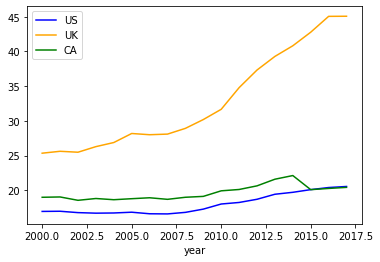

In [34]:
df_us_fuel.groupby('year').mean()['city_mpg'].plot(label='US', c='b', legend=True)
df_uk_fuel.groupby('year').mean()['city_mpg'].plot(label='UK', c='orange', legend=True)
df_ca_fuel.groupby('year').mean()['city_mpg'].plot(label='CA', c='g', legend=True);

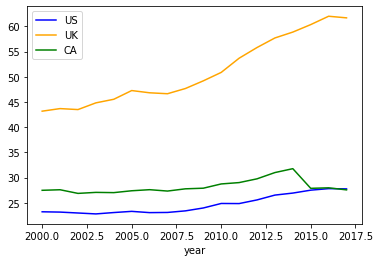

In [35]:
df_us_fuel.groupby('year').mean()['highway_mpg'].plot(label='US', c='b', legend=True)
df_uk_fuel.groupby('year').mean()['highway_mpg'].plot(label='UK', c='orange', legend=True)
df_ca_fuel.groupby('year').mean()['highway_mpg'].plot(label='CA', c='g', legend=True);

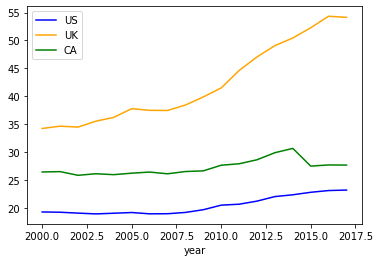

In [36]:
df_us_fuel.groupby('year').mean()['combined_mpg'].plot(label='US', c='b', legend=True)
df_uk_fuel.groupby('year').mean()['combined_mpg'].plot(label='UK', c='orange', legend=True)
df_ca_fuel.groupby('year').mean()['combined_mpg'].plot(label='CA', c='g', legend=True);

It looks like there is some difference in the MPG for both city and highway, as well as combined mpg. Canada and the USA are close in all 3 categories, which does make some sense since they are geographic neighbors. The UK on the other hand is well above both in every mpg category. Each country has a different way that the fuel economy tests are performed, so we would expect the results to be slightly varied, and I would expect the margin would be around 4-7 mpg. And that margin of measurement difference is seen in the city fuel economy testing, with a 5 mile per gallon advantage for the UK vehicles, but a greater gap in fuel economy is seen in both the highway testing as well as the combined gas milage results. 

Another cause for the difference among the test results is the types of vehicles that are more common in one country over another. The UK for example is a smaller country, geographically speaking, and larger, more powerful vehicles may be less popular there. Whereas both the USA and Canada are much larger areas of land, and bigger cars with larger gas tanks may be more preferred. Though these datasets are missing some key features regarding the vehicle details, some of that is due to dropping features that one dataset may have had to not give that country an advantage when it comes to modeling the data over the other countries, we still have some features that can be used.

__To note: the vehicles can be broken down into further and further submodels which can affect the vehicle details such as one sedan can have submodels that use desiel fuel instead and have a different bodystyle, affecting the weight, engine, transmission, etc. Due to this, exact vehicle details aside from what the countries themselves have made public is not available without an identification number such as a VIN__

<br>

In [37]:
# The vehicle class feature for the UK dataset is missing most of the values for its vehicles, and is only comprised of values that were able to extracted from the model name at this point.
# because of this, the UK data won't be used in exploring that involves this feature.

us_fuel_by_class = df_us_fuel.groupby( 'vehicle_class')[['engine_size', 'city_mpg', 
                                                         'highway_mpg', 'combined_mpg', 'num_gears']].mean()

ca_fuel_by_class = df_ca_fuel.groupby( 'vehicle_class')[['engine_size', 'city_mpg',
                                                         'highway_mpg', 'combined_mpg', 'num_gears']].mean()

us_ca_fuel_differences_by_class = us_fuel_by_class - ca_fuel_by_class 

print('Average difference in engine sizes between the USA and Canada: {}'.format(us_ca_fuel_differences_by_class['engine_size'].mean()))

Average difference in engine sizes between the USA and Canada: 0.06169989645936648


Without considering the count of vehicles in each class, the engines in the vehicles used for fuel economy testing are just slighlty in the USA than those used in the testing for Canada

<br>

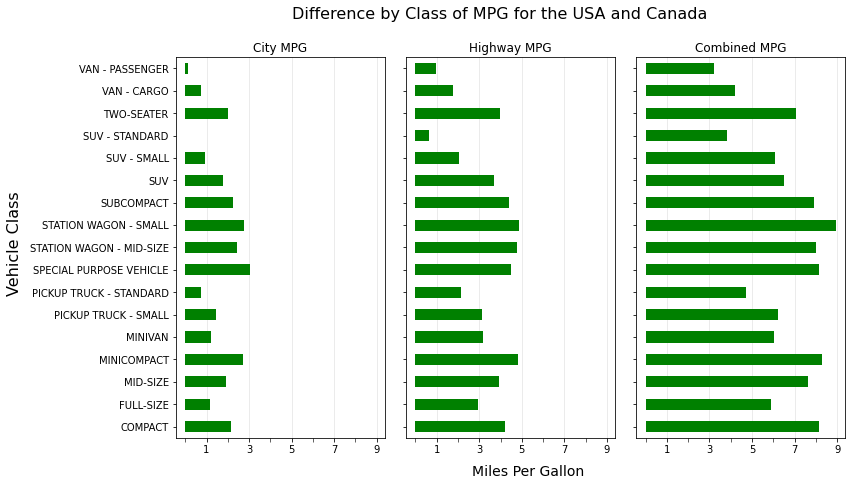

In [38]:
country_colors_signs = {-1.0:'b', 1.0:'g'} # -1.0 for USA, 1.0 for Canada

us_ca_signs_city = np.sign(-us_ca_fuel_differences_by_class.city_mpg)
us_ca_signs_hwy = np.sign(-us_ca_fuel_differences_by_class.highway_mpg)
us_ca_signs_comb = np.sign(-us_ca_fuel_differences_by_class.combined_mpg)

us_ca_signC_city = map(country_colors_signs.get, us_ca_signs_city)
us_ca_signC_hwy = map(country_colors_signs.get, us_ca_signs_hwy)
us_ca_signC_comb = map(country_colors_signs.get, us_ca_signs_comb)


fig, axes = plt.subplots(1, 3, sharex='row', sharey='row', figsize=(12,7), frameon=True)
fig.suptitle('Difference by Class of MPG for the USA and Canada', size='16')

# City mpg
(-us_ca_fuel_differences_by_class.city_mpg).plot(kind='barh', color=us_ca_signC_city, ax=axes[0], title='City MPG')

axes[0].set_axisbelow(True); axes[0].grid(True, axis='x', which='major', alpha=0.3)
axes[0].set_ylabel('')
axes[0].set_xticks(np.arange(0,4), minor=False); 
axes[0].set_xticks(np.arange(0.5, 3, 0.5), minor=True)
axes[0].tick_params('x', which='minor', length=4)

# Highway mpg
(-us_ca_fuel_differences_by_class.highway_mpg).plot(kind='barh', color=us_ca_signC_hwy, ax=axes[1], title='Highway MPG')

axes[1].set_axisbelow(True); axes[1].grid(True, axis='x', which='major', alpha=0.3)
axes[1].set_xticks(np.arange(0,6), minor=False); 
axes[1].set_xticks(np.arange(0.5, 5, 0.5), minor=True)
axes[1].tick_params('x', which='minor', length=4)

# Combined MPG
(-us_ca_fuel_differences_by_class.combined_mpg).plot(kind='barh', color=us_ca_signC_comb, ax=axes[2], title='Combined MPG')

axes[2].set_axisbelow(True); axes[2].grid(True, axis='x', which='major', alpha=0.3)
axes[2].set_xticks(np.arange(0,10, 2), minor=True); 
axes[2].set_xticks(np.arange(1, 11, 2), minor=False)
axes[2].tick_params('x', which='minor', length=4)


fig.subplots_adjust(wspace=0.1)
plt.text(-5.5,-2.2,'Miles Per Gallon', fontsize='14', horizontalalignment='center')
plt.text(-30, 6, 'Vehicle Class', size='16', rotation='vertical');

We can better see by how much Canada is leading in all 3 fuel economy ratings. The only one, where the difference is so small it isn't visable, where the USA gets better fuel economy scores is the Standard Size SUV group for city mpg.

In [39]:
def make_barplots(df, cat):    
    m_shape= df.make.unique().size//3
    m_slice = df.make.unique()[:m_shape]    # slicing makes for readability
    
    fig_make, barplot_makes_ax = plt.subplots(3,1, figsize=(16,12), sharey=True)
    sns.barplot(x='make', y=cat, data=df[df.make.isin(m_slice)], hue='country', ax=barplot_makes_ax[0])

    m_slice = df.make.unique()[m_shape:m_shape*2] 
    sns.barplot(x= 'make', y= cat, data= df[df.make.isin(m_slice)], hue='country', ax=barplot_makes_ax[1])
    
    m_slice = df.make.unique()[-m_shape:] 
    sns.barplot(x= 'make', y= cat, data= df[df.make.isin(m_slice)], hue='country', ax=barplot_makes_ax[2]).set(xlabel='', ylabel='')

    major_yticks0 = np.arange(0,int(round(df[cat].max(),-1))+10,10)
    minor_yticks0 = np.arange(5,major_yticks0[-1]+5,10)
    
    [(barplot.set(xlabel='', ylabel=''),
        barplot.tick_params(axis='y', which='minor', labelsize=0, length=3),
        barplot.set_yticks(major_yticks0),
        barplot.set_yticks(minor_yticks0, minor=True),
        barplot.set_axisbelow(True),
        barplot.grid(True, axis='y', which='major', alpha=0.3),
        barplot.get_legend().remove())
     for barplot in barplot_makes_ax]
    
    barplot_makes_ax[2].legend(loc='center left', bbox_to_anchor=(1.01, 1.6), fontsize=12, title='Countries', title_fontsize=12)

    ax0 = fig_make.add_subplot(111, frameon=False)
    ax0.set(xlabel='', xticks=[], yticks=[])
    lcat, rcat = (cat.split('_')[0].capitalize(), (cat.split('_'))[1].upper())
    ax0.set_ylabel('{} {}'.format(lcat, rcat), labelpad=45, size=16)
    ax0.set_title('{} {} by Make and Country'.format(lcat, rcat));

The United States and the United Kingdom both contain vehicle makes that are unique to that country and not found in the other two, with Canada not having any unique vehicle makes. Below is the fuel economy rating in each category (city, highway, and combined) that each of these car brands averages per country.

In [40]:
makes_common_in_all = set(df_us_fuel.make).intersection(df_uk_fuel.make, df_ca_fuel.make)    # Only looking at makes found in all 3 datasets

common_makes_USall = df_us_fuel[df_us_fuel.make.isin(makes_common_in_all)].groupby('make').mean().reset_index()
common_makes_USall['country'] = 'USA'
common_makes_UKall = df_uk_fuel[df_uk_fuel.make.isin(makes_common_in_all)].groupby('make').mean().reset_index()
common_makes_UKall['country'] = 'UK'
common_makes_CAall = df_ca_fuel[df_ca_fuel.make.isin(makes_common_in_all)].groupby('make').mean().reset_index()
common_makes_CAall['country'] = 'Canada'
common_makes_all = pd.concat([common_makes_USall, common_makes_UKall, common_makes_CAall])

### City MPG by car brand

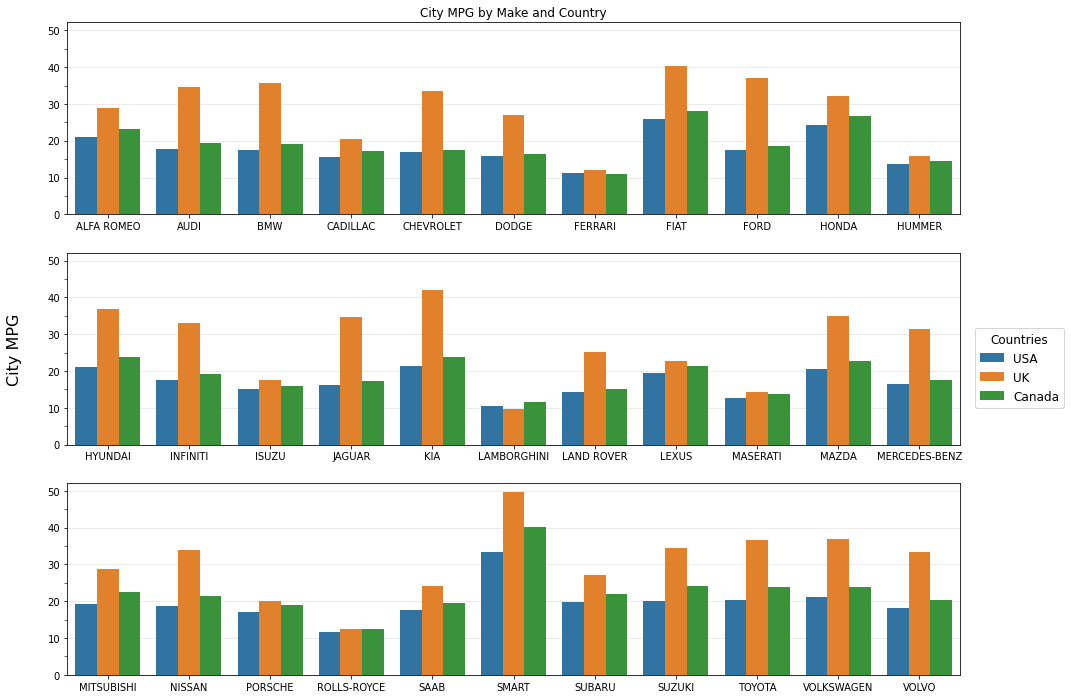

In [41]:
make_barplots(common_makes_all, 'city_mpg')

Smart cars, being known for their small size and great fuel efficiency, trumps every other car brand. Interestingly, it seems that the UK has significantly higher city fuel economy ratings for almost all car brands across this category, with the only brands where the UK fairs worse or on par being with exotic cars.

### Highway MPG by car brand

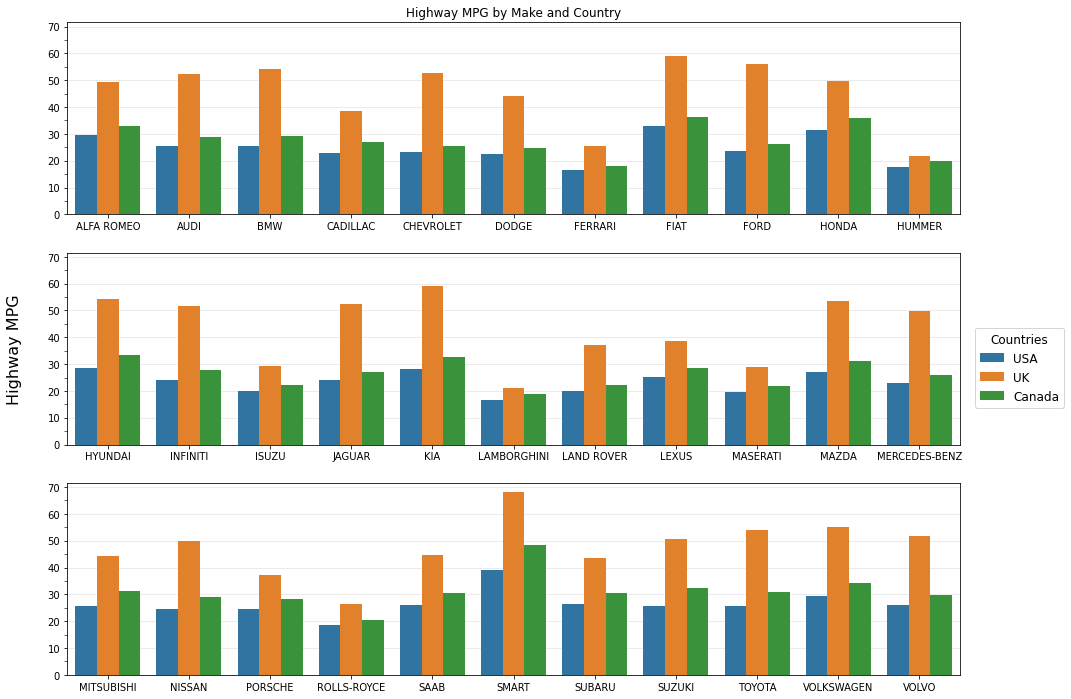

In [42]:
make_barplots(common_makes_all, 'highway_mpg')

### Combined MPG by car brand

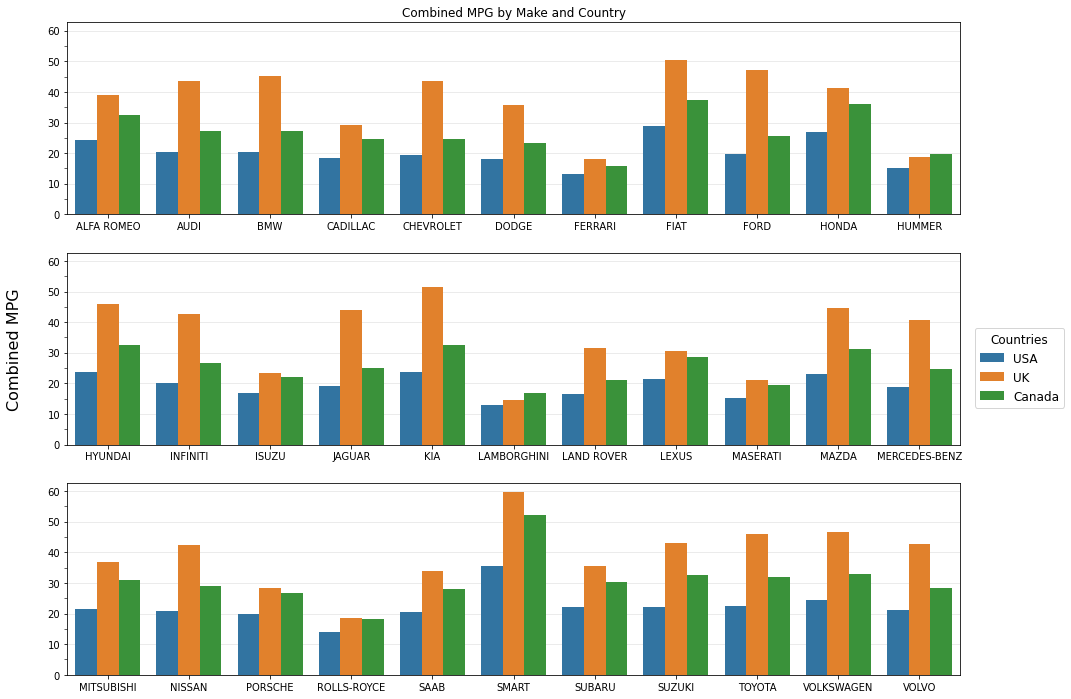

In [43]:
make_barplots(common_makes_all, 'combined_mpg')

Overall, the UK seems to be averaging better fuel economy across all categories for most of the common car brands. The only exception where another country averaged better fuel economy was `Lamborghini` in both the city and combined fuel economy ratings. `Lamborghini` also scored very slighly better city mpg in the USA over the UK but still less than in Canada.

In [44]:
df_us_fuel.to_pickle(data_dir + 'USA/df_us_fuel.pkl')
df_ca_fuel.to_pickle(data_dir + 'Canada/df_ca_fuel.pkl')